In [4]:
import sys
sys.path.append('..')


#from rdsolver import turing_pattern as tNp
#dir(rds)
from rdsolver.reaction_diffu import *

In [733]:
class ABC_Selection(RDSystem):
    def __init__(self,
                 Db = 2e-2, Dc =1e-2,
                 kab = 1e-5,
                 kba = 3e-4,
                 kac = 1e-5,
                 kca = 3e-4,
                 phi = 1e-1,
                 a0 = 20,
                 space_size = 30,dim = 2,
                 dt=0.01,
                 boundary = 'periodic',
                 init_dis= 'random',
                 init_boundary = False,
                 *args):
        self.kab, self.kba, self.kac ,self.kca, self.phi, self.a0 = (kab, kba, kac, kca, phi, a0)
        Reactant1 = Reactant(Db)
        Reactant2 = Reactant(Dc)
        reactants = [Reactant1,Reactant2]
        RDSystem.__init__(
        self,reactants,
        space_size =space_size, 
        init_dis = init_dis ,
        boundary = boundary, dim=dim,dt=dt)
        self.dx = 1
        if init_boundary == True:
            self.dis[0,:,:] = a0/3
            self.dis[0,round(4*space_size/9):round(6*space_size/9),round(4*space_size/9):round(6*space_size/9)] = 0
            self.dis[1,:,:] = 0
            self.dis[1,round(4*space_size/9):round(6*space_size/9),round(4*space_size/9):round(6*space_size/9)] = a0/3
            #self.dis = self.dis*a0
            #self.dis[1] = self.dis[1]
        
    def reaction(self):
        u = self.dis
        dudt_reac = np.zeros(np.shape(self.dis))      
        if self.dim==2: #2D 
            dudt_reac[0,:,:] += self.kba * (self.a0-u[0]-u[1]) * u[0]**2 - self.kab * u[0]**3 - self.phi * u[0]
            dudt_reac[1,:,:] += self.kca * (self.a0-u[0]-u[1]) * u[1]**2 - self.kac * u[1]**3 - self.phi * u[1]
        return dudt_reac

## Competing and co-existance

initilize as follows
```
self.dis[0,:,:] = a0/3
self.dis[1,:,:] = 0     self.dis[1,round(4*space_size/9):round(6*space_size/9),round(4*space_size/9):round(6*space_size/9)] = a0/2
```

In [661]:
ABC = ABC_Selection(
                 Db = 1e-1, Dc =10e-1,
                 kab = 1e-2,
                 kba = 3e-1,
                 kac = 1e-2,
                 kca = 3e-1,
                 phi = 2,
                 a0 = 20,
                 init_boundary = True)
#Turing_1.stationary()
t=np.linspace(0,50,1000)
time_series = ABC.integrate(t);

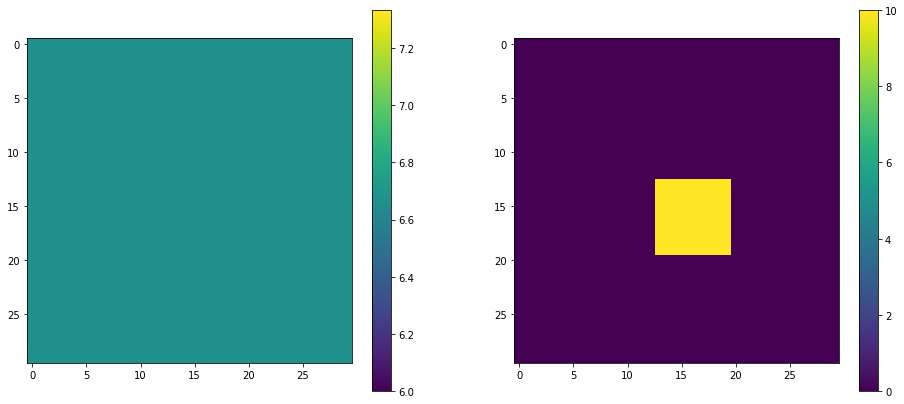

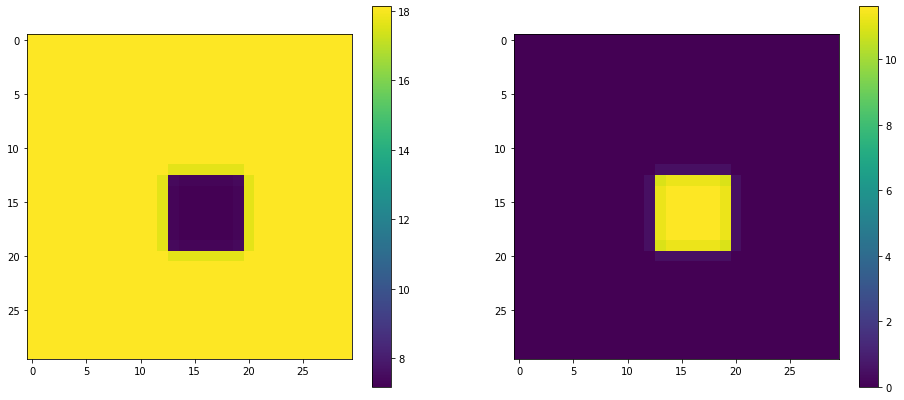

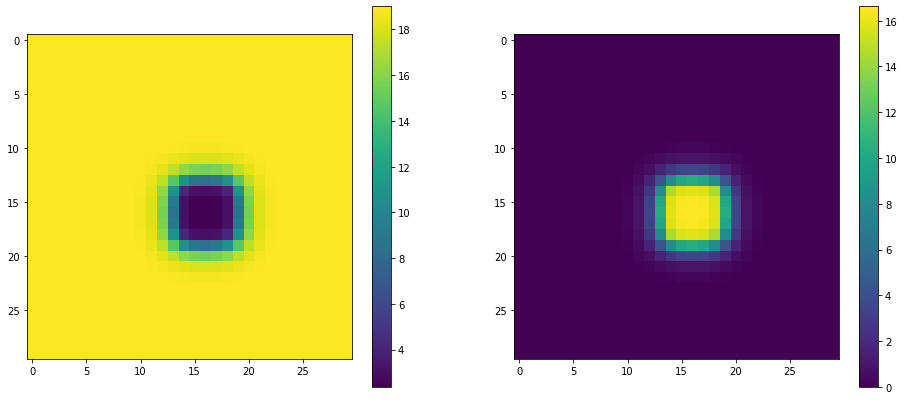

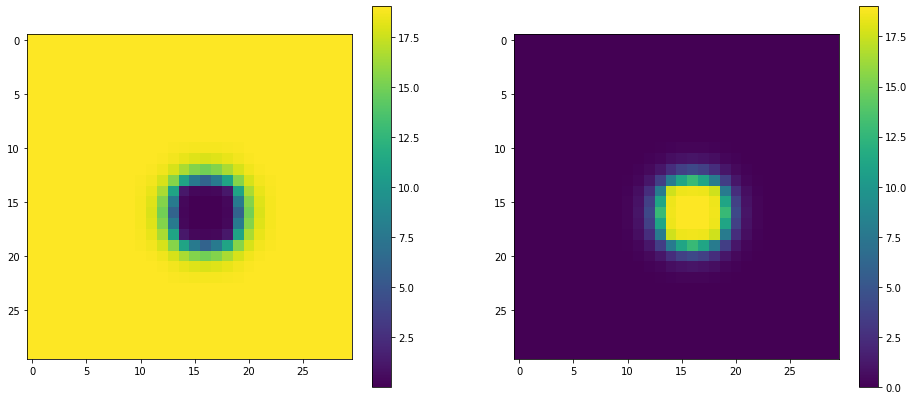

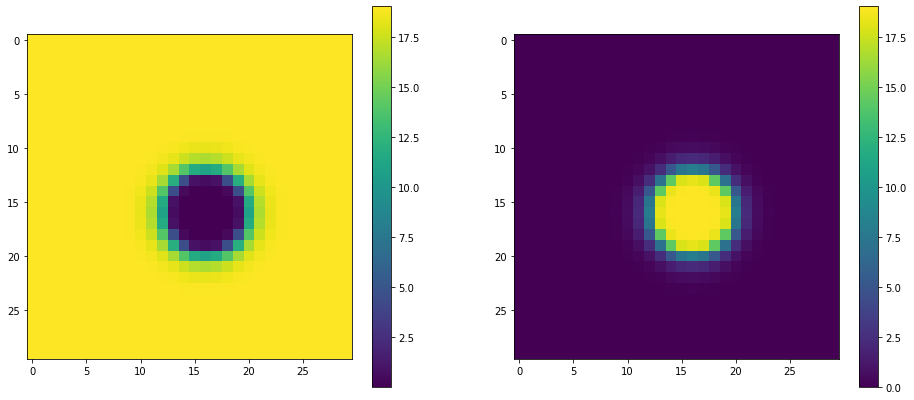

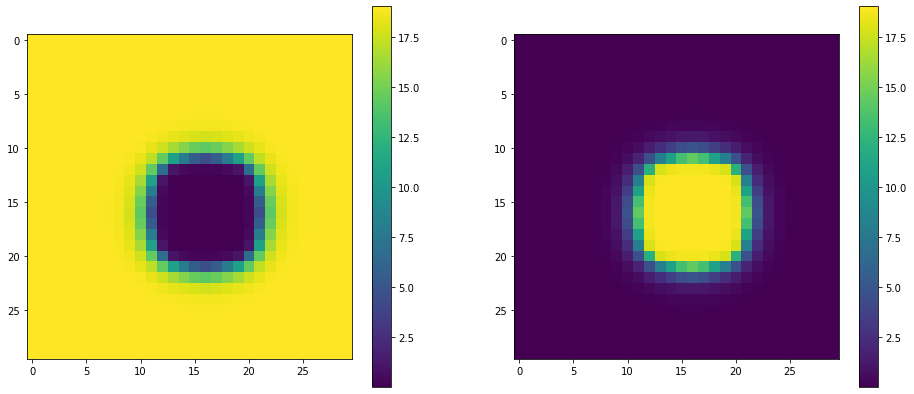

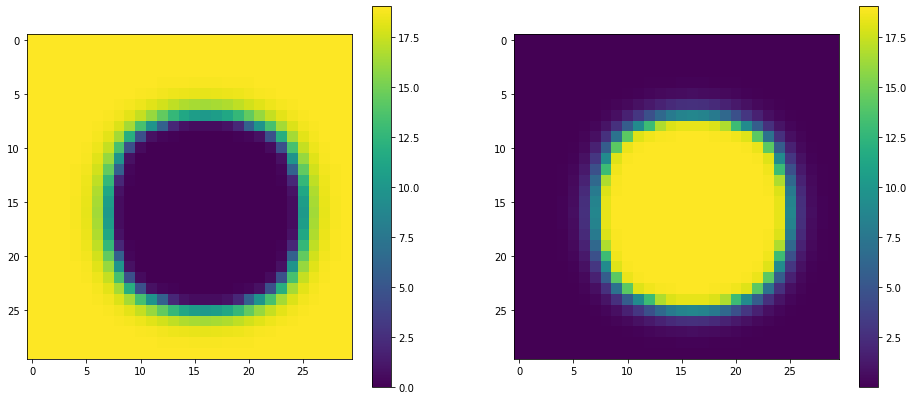

In [662]:
for times in [0,1,30,100,200,500,999]:
    fig, (ax1,ax2) = plt.subplots(figsize = (16,7), nrows=1, ncols=2)
    p1 = ax1.imshow(time_series[times].reshape((2,30,30))[0,:,:])
    #ax1.colorbar()
    fig.colorbar(p1, ax=ax1)
    p2 = ax2.imshow(time_series[times].reshape((2,30,30))[1,:,:])
    fig.colorbar(p2, ax=ax2)
    #fig.colorbar()
    plt.show()

###  Try to see more complex pattern

In [761]:
ABC = ABC_Selection(
                 Db = 1e-3, Dc =5e-3,
                 kab = 1e-1,
                 kba = 1e0,
                 kac = 1e-1,
                 kca = 1e0,
                 phi = np.exp(-5),
                 a0 = 1,
                 init_boundary = True)
#Turing_1.stationary()
t=np.linspace(0,1000,1000)
time_series = ABC.integrate(t);

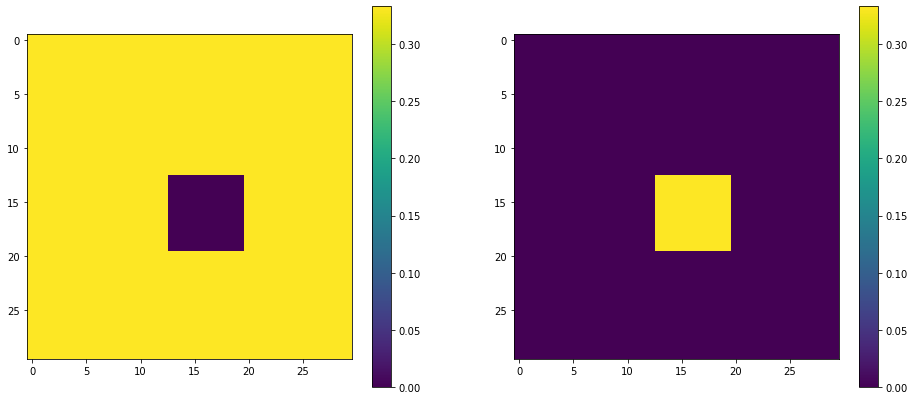

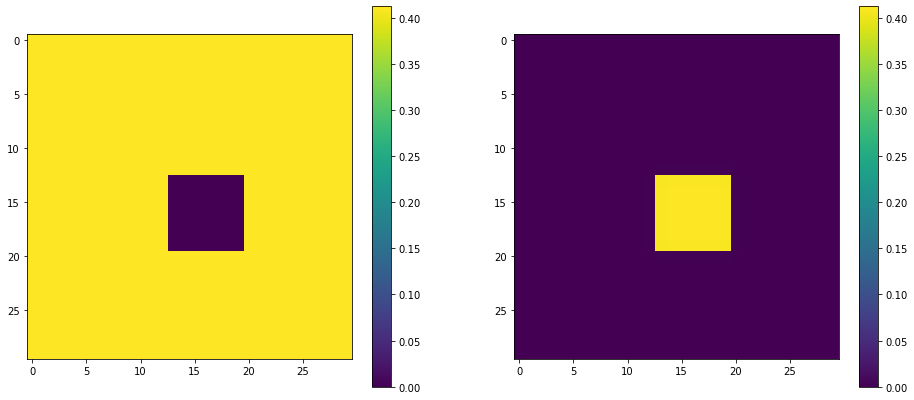

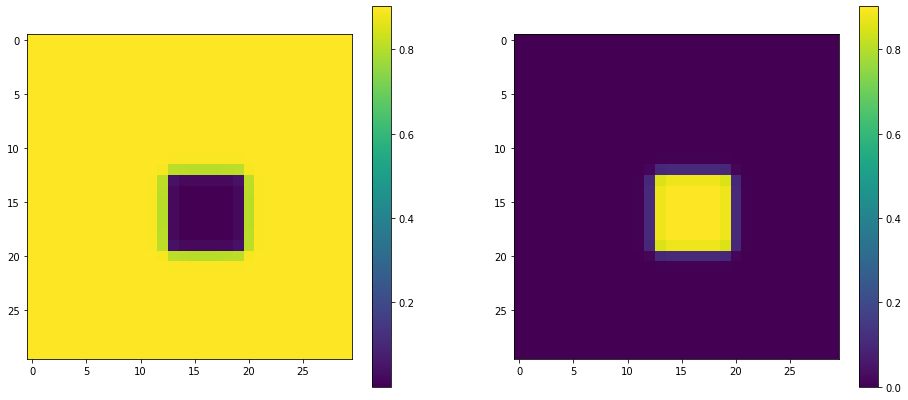

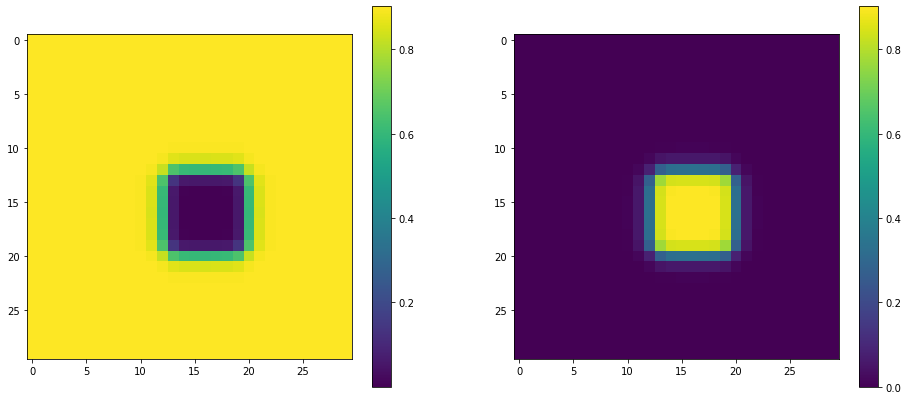

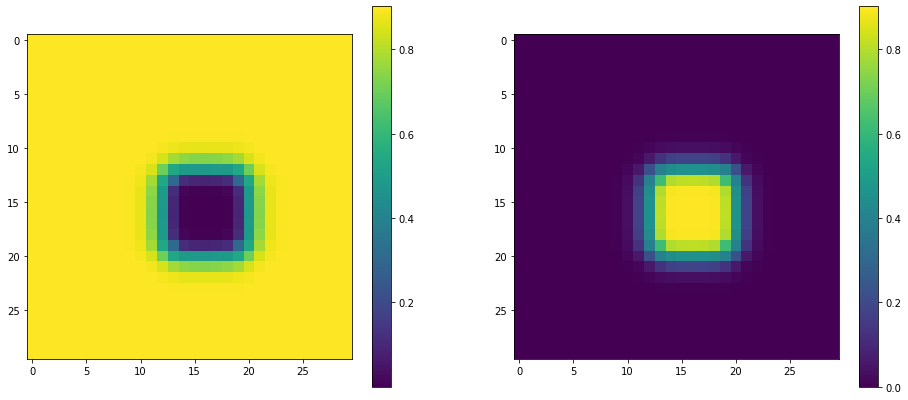

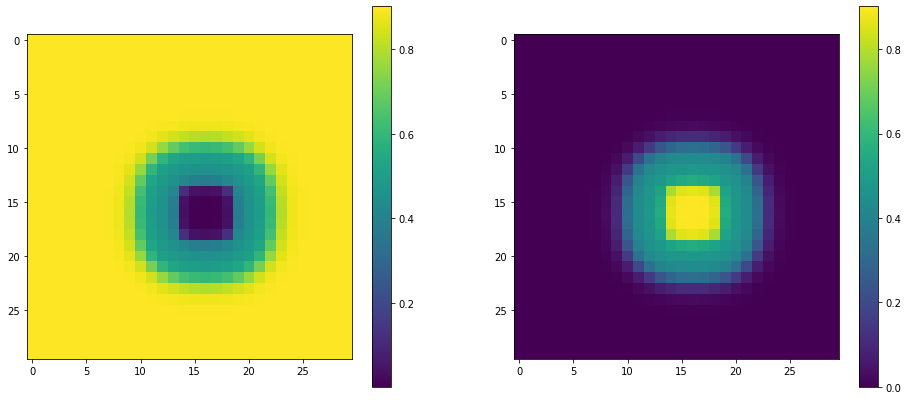

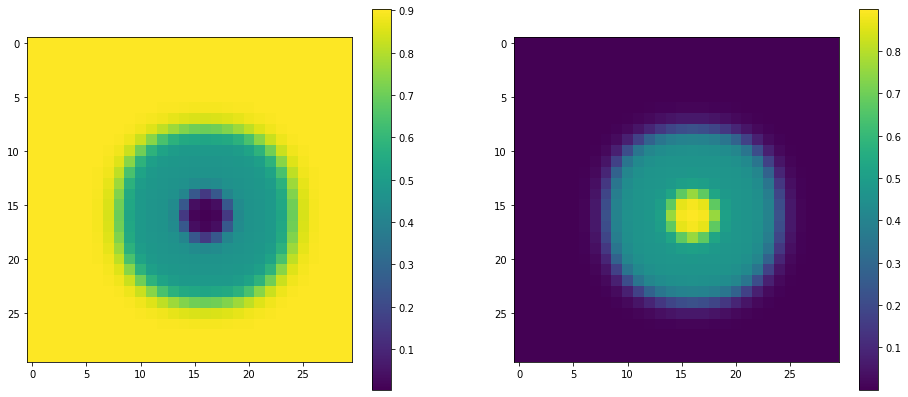

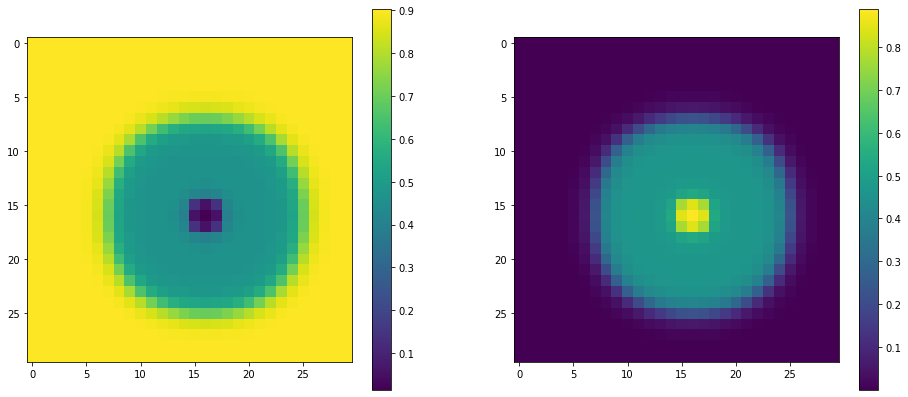

In [762]:
for times in [0,1,30,100,200,500,800,999]:
    fig, (ax1,ax2) = plt.subplots(figsize = (16,7), nrows=1, ncols=2)
    p1 = ax1.imshow(time_series[times].reshape(ABC.dis.shape)[0,:,:])
    #ax1.colorbar()
    fig.colorbar(p1, ax=ax1)
    p2 = ax2.imshow(time_series[times].reshape(ABC.dis.shape)[1,:,:])
    fig.colorbar(p2, ax=ax2)
    #fig.colorbar()
    plt.show()